<a href="https://colab.research.google.com/github/nrd2/EksamML/blob/main/WineDatasetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liberies

In [2]:
! pip install -q kaggle

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



In [9]:
! chmod 600 kaggle.json

In [10]:

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

#Download and see data

##Get first dataset

In [11]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
! unzip red-wine-quality-cortez-et-al-2009.zip

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 20.1MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [12]:
df = '/content/winequality-red.csv'
data = pd.read_csv(df)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#Add column type with value "red"
typeRed = 'red'
data['type'] = typeRed

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
data.type

0       red
1       red
2       red
3       red
4       red
       ... 
1594    red
1595    red
1596    red
1597    red
1598    red
Name: type, Length: 1599, dtype: object

##Get secound dataset

In [15]:
!kaggle datasets download -d rajyellow46/wine-quality
! unzip wine-quality.zip

100% 98.0k/98.0k [00:00<00:00, 280kB/s]
100% 98.0k/98.0k [00:00<00:00, 280kB/s]
Archive:  wine-quality.zip
  inflating: winequalityN.csv        


In [16]:
df = '/content/winequalityN.csv'
dataBig = pd.read_csv(df)
dataBig.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataBig.type

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

##Combine datasets

In [17]:
combinedData = pd.concat([dataBig, data], axis=0)

In [18]:
combinedData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
combinedData.type

0       white
1       white
2       white
3       white
4       white
        ...  
1594      red
1595      red
1596      red
1597      red
1598      red
Name: type, Length: 8096, dtype: object

#Prepare and plot combined dataset

In [19]:
combinedData['type'].value_counts()

white    4898
red      3198
Name: type, dtype: int64

In [20]:
combinedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  8096 non-null   object 
 1   fixed acidity         8086 non-null   float64
 2   volatile acidity      8088 non-null   float64
 3   citric acid           8093 non-null   float64
 4   residual sugar        8094 non-null   float64
 5   chlorides             8094 non-null   float64
 6   free sulfur dioxide   8096 non-null   float64
 7   total sulfur dioxide  8096 non-null   float64
 8   density               8096 non-null   float64
 9   pH                    8087 non-null   float64
 10  sulphates             8092 non-null   float64
 11  alcohol               8096 non-null   float64
 12  quality               8096 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 885.5+ KB


In [21]:
combinedData.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [22]:
combinedData = combinedData.dropna()

In [23]:
combinedData.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
combinedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8062 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  8062 non-null   object 
 1   fixed acidity         8062 non-null   float64
 2   volatile acidity      8062 non-null   float64
 3   citric acid           8062 non-null   float64
 4   residual sugar        8062 non-null   float64
 5   chlorides             8062 non-null   float64
 6   free sulfur dioxide   8062 non-null   float64
 7   total sulfur dioxide  8062 non-null   float64
 8   density               8062 non-null   float64
 9   pH                    8062 non-null   float64
 10  sulphates             8062 non-null   float64
 11  alcohol               8062 non-null   float64
 12  quality               8062 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 881.8+ KB


In [24]:
combinedData.type

0       white
1       white
2       white
3       white
4       white
        ...  
1594      red
1595      red
1596      red
1597      red
1598      red
Name: type, Length: 8062, dtype: object

In [25]:
combinedData = combinedData.replace('white',0)
combinedData = combinedData.replace('red',1)


In [26]:
combinedData.type

0       0
1       0
2       0
3       0
4       0
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: type, Length: 8062, dtype: int64

###Correlation Matrix

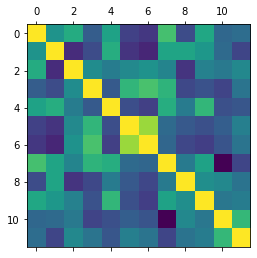

In [ ]:
plt.matshow(combinedData.corr())
plt.show()

<Axes: >

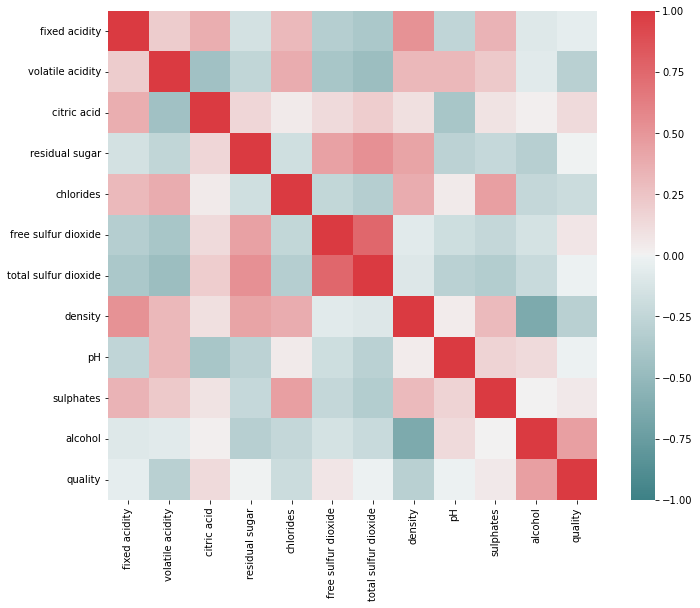

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 9))
corr = combinedData.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(200, 11, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

##Split Dataset

In [27]:
X = combinedData.drop('quality', axis=1)
y = combinedData['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

                                                   
print ('----------------------------------')                                                    
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('----------------------------------')   



----------------------------------
Train set: (6449, 12) (6449,)
Test set: (1613, 12) (1613,)
----------------------------------


#Train model 

Random Forest Classifier

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


#Hyperperamenters
max_depth = [4,150]
min_samples_leaf = [4,150]
min_samples_split = [10,30]
max_leaf_nodes= [4,150]
n_estimators = [800]
tree_param = [{'n_estimators':n_estimators,'bootstrap':[True, False], 'max_leaf_nodes':max_leaf_nodes, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}]


#Define model
modelRandomForestClassifier = GridSearchCV(RandomForestClassifier(), tree_param, cv=5)
#models= RandomForestClassifier(n_estimators=500, bootstrap=True, random_state=42) #Define model


#train model
modelRandomForestClassifier = modelRandomForestClassifier.fit(X_train, y_train) #train model


#test model
y_predlrR = modelRandomForestClassifier.predict(X_test) #test model

In [29]:
modelRandomForestClassifier.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=150, max_leaf_nodes=150,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800)

In [ ]:
#Accuracy
print('model accuracy score',modelRandomForestClassifier.score(X_test, y_test))

model accuracy score 0.7879727216367018


In [ ]:
modelRandomForestClassifier.feature_importances_

array([0.0045438 , 0.07595904, 0.10092762, 0.07878603, 0.08288255,
       0.08668842, 0.08123011, 0.09098389, 0.0998797 , 0.08021162,
       0.08901842, 0.12888879])

Gradient Boosting Classifier

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#Hyperperamenters
max_depth = [4,5,150]
learning_rate = [0.001,0.06,0.07,0.08]
n_iter_no_change = [4,5,6,150]
gradient_param = [{'n_estimators': [1000], 'max_depth': max_depth, 'n_iter_no_change': n_iter_no_change, 'learning_rate': learning_rate, 'random_state': [42]}]


#Define model
modelGradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), gradient_param, cv=5)
#modelGradientBoostingClassifier = GradientBoostingClassifier(n_estimators=500, n_iter_no_change=10, learning_rate=0.05, max_depth=2, random_state=42) #Define model

#train model
modelGradientBoostingClassifier = modelGradientBoostingClassifier.fit(X_train, y_train) #train model

#test model
y_predGBC = modelGradientBoostingClassifier.predict(X_test) #test model

In [ ]:
modelGradientBoostingClassifier.best_estimator_

In [ ]:
#Accuracy
print('model accuracy score',modelGradientBoostingClassifier.score(X_test, y_test))

model accuracy score 0.6150030998140111


In [ ]:
modelGradientBoostingClassifier.n_estimators_

500

In [ ]:
modelGradientBoostingClassifier.feature_importances_

array([0.00684971, 0.04681752, 0.15346785, 0.04011646, 0.05886932,
       0.04397913, 0.04656757, 0.06028917, 0.06512374, 0.04005515,
       0.07229034, 0.36557405])

HistGradientBoostingClassifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier


#Hyperperamenters
max_depth = [4,5,6]
learning_rate = [0.05,0.06,0.07]
n_iter_no_change = [4,120,150]
gradient_param = [{'max_iter': [1000], 'max_depth': max_depth, 'early_stopping': [True], 'n_iter_no_change': n_iter_no_change, 'learning_rate': learning_rate, 'random_state': [42]}]


#Define model
modelHistGradientBoostingClassifier = GridSearchCV(HistGradientBoostingClassifier(), gradient_param, cv=5)
#modelHistGradientBoostingClassifier = HistGradientBoostingClassifier(max_iter=800, early_stopping=True, n_iter_no_change=10, learning_rate=0.05, max_depth=2, random_state=42) #Define model


#Training
modelHistGradientBoostingClassifier = modelHistGradientBoostingClassifier.fit(X_train, y_train) #train model

#Predict
y_predHGBC = modelHistGradientBoostingClassifier.predict(X_test) #test model

In [ ]:
modelHistGradientBoostingClassifier.best_estimator_

HistGradientBoostingClassifier(early_stopping=True, learning_rate=0.05,
                               max_depth=6, max_iter=1000, n_iter_no_change=150,
                               random_state=42)

In [ ]:
print('model accuracy score',modelHistGradientBoostingClassifier.score(X_test, y_test))

model accuracy score 0.7625542467451953


In [ ]:
modelHistGradientBoostingClassifier.n_iter_

Decission Tree with GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier


max_depth = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
min_samples_leaf = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
min_samples_split = [10,20,30]
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}]


modelDecisionTreeClassifier = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

modelDecisionTreeClassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                        30, 40, 50, 70, 90, 120, 150],
                          'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                               20, 30, 40, 50, 70, 90, 120,
                                               150],
                          'min_samples_split': [10, 20, 30]}])

In [ ]:
modelDecisionTreeClassifier.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
#Accuracy 
print('model accuracy score',modelDecisionTreeClassifier.score(X_test, y_test))

model accuracy score 0.6416615003099814
